<a href="https://www.kaggle.com/code/sonawanelalitsunil/indian-marriage-and-divorce-ml-73?scriptVersionId=220888494" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/indian-marriage-and-divorce-dataset/marriage_divorce_india_with_id.csv


# <p style="background-color: #e0f7fa; font-size: 120%; text-align: center; border-radius: 15px; color: #1a1a1a; font-weight: bold; font-family: 'Helvetica', 'Arial', sans-serif; border: 5px solid #00796B; padding: 15px; margin: 15px;">Indian Marriage and Divorce|ML|</p>

**The Indian Marriage and Divorce Dataset provides comprehensive insights into marriage and divorce trends across India. It includes statistical records segmented by:**

**Demographics**: Age, gender, education, and religion of individuals.

**Regional Distribution**: Data categorized by state and urban/rural regions.

**Marriage Trends**: Number of marriages per year, average age at marriage, and type of marriage (arranged, love, inter-caste, inter-religion).

**Divorce Statistics**: Number of divorces per year, reasons for divorce (incompatibility, domestic violence, financial issues, etc.), and duration of marriage before divorce.

**Legal Aspects**: Trends in court cases related to marriage laws, alimony, and child custody.

This dataset can be useful for sociological research, policy-making, and understanding cultural shifts in marriage and divorce patterns in India.

# <p style="background-color: #e0f7fa; font-size: 120%; text-align: center; border-radius: 15px; color: #1a1a1a; font-weight: bold; font-family: 'Helvetica', 'Arial', sans-serif; border: 5px solid #00796B; padding: 15px; margin: 15px;">Import Libraries</p>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from tabulate import tabulate


import warnings
warnings.filterwarnings('ignore')

# <p style="background-color: #e0f7fa; font-size: 120%; text-align: center; border-radius: 15px; color: #1a1a1a; font-weight: bold; font-family: 'Helvetica', 'Arial', sans-serif; border: 5px solid #00796B; padding: 15px; margin: 15px;">Import Dataset</p>

In [3]:
data = pd.read_csv("/kaggle/input/indian-marriage-and-divorce-dataset/marriage_divorce_india_with_id.csv")



print("------------------- Top values ---------------------")
data.head()

------------------- Top values ---------------------


,Unique ID,Marriage Duration (Years),Age at Marriage,Marriage Type,Education Level,Income Level (INR per month),Caste/Religion,Urban/Rural,Family Involvement,Children,Divorce Status
0,MD1,39,29,Love,Secondary,113464,Hindu,Rural,Moderate,2,No
1,MD2,29,34,Arranged,No Education,18682,Jain,Rural,Moderate,0,Yes
2,MD3,15,34,Love,No Education,159455,Muslim,Urban,Moderate,4,Yes
3,MD4,8,27,Arranged,Postgraduate,63160,Jain,Urban,High,1,Yes
4,MD5,21,34,Love,Secondary,28666,Jain,Urban,High,1,Yes


In [4]:
print("------------------- Top Down values ---------------------")
data.tail()

------------------- Top Down values ---------------------


,Unique ID,Marriage Duration (Years),Age at Marriage,Marriage Type,Education Level,Income Level (INR per month),Caste/Religion,Urban/Rural,Family Involvement,Children,Divorce Status
1195,MD1196,38,22,Love,Primary,26638,Muslim,Urban,High,4,No
1196,MD1197,34,21,Arranged,Postgraduate,6073,Hindu,Rural,Moderate,2,No
1197,MD1198,12,23,Arranged,Postgraduate,182583,Other,Rural,Moderate,3,Yes
1198,MD1199,19,31,Arranged,Secondary,34320,Christian,Rural,Moderate,4,No
1199,MD1200,37,26,Love,No Education,39924,Jain,Rural,Moderate,0,No


In [5]:
print("------------------- Types of data ---------------------")
data.dtypes

------------------- Types of data ---------------------


Unique ID                       object
Marriage Duration (Years)        int64
Age at Marriage                  int64
Marriage Type                   object
Education Level                 object
Income Level (INR per month)     int64
Caste/Religion                  object
Urban/Rural                     object
Family Involvement              object
Children                         int64
Divorce Status                  object
dtype: object

In [6]:
print("------------------- Describe ---------------------")
data.describe()

------------------- Describe ---------------------


,Marriage Duration (Years),Age at Marriage,Income Level (INR per month),Children
count,1200.000000,1200.000000,1200.00000,1200.000000
mean,20.553333,26.055000,102353.21250,1.885833
std,11.468512,4.891003,55761.10746,1.453580
min,1.000000,18.000000,5287.00000,0.000000
25%,10.000000,22.000000,54522.00000,1.000000
50%,22.000000,26.000000,101888.50000,2.000000
75%,30.000000,30.000000,150568.75000,3.000000
max,39.000000,34.000000,199999.00000,4.000000


In [7]:
print("------------------- Information ---------------------")
data.info()

------------------- Information ---------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Unique ID                     1200 non-null   object
 1   Marriage Duration (Years)     1200 non-null   int64 
 2   Age at Marriage               1200 non-null   int64 
 3   Marriage Type                 1200 non-null   object
 4   Education Level               1200 non-null   object
 5   Income Level (INR per month)  1200 non-null   int64 
 6   Caste/Religion                1200 non-null   object
 7   Urban/Rural                   1200 non-null   object
 8   Family Involvement            1200 non-null   object
 9   Children                      1200 non-null   int64 
 10  Divorce Status                1200 non-null   object
dtypes: int64(4), object(7)
memory usage: 103.2+ KB


In [8]:
print("------------------- Null values present in dataset ---------------------")
data.isnull().sum()

------------------- Null values present in dataset ---------------------


Unique ID                       0
Marriage Duration (Years)       0
Age at Marriage                 0
Marriage Type                   0
Education Level                 0
Income Level (INR per month)    0
Caste/Religion                  0
Urban/Rural                     0
Family Involvement              0
Children                        0
Divorce Status                  0
dtype: int64

In [9]:
print("------------------- Total values present in dataset ---------------------")
data.shape

------------------- Total values present in dataset ---------------------


(1200, 11)

In [10]:
print("------------------- Total columns presents in dataset ---------------------")
data.columns

------------------- Total columns presents in dataset ---------------------


Index(['Unique ID', 'Marriage Duration (Years)', 'Age at Marriage',
       'Marriage Type', 'Education Level', 'Income Level (INR per month)',
       'Caste/Religion', 'Urban/Rural', 'Family Involvement', 'Children',
       'Divorce Status'],
      dtype='object')

In [11]:
categorical_cols = ['Marriage Type', 'Education Level', 'Caste/Religion', 'Urban/Rural', 'Family Involvement', 'Divorce Status']
for col in categorical_cols:
    data[col] = data[col].astype('category')

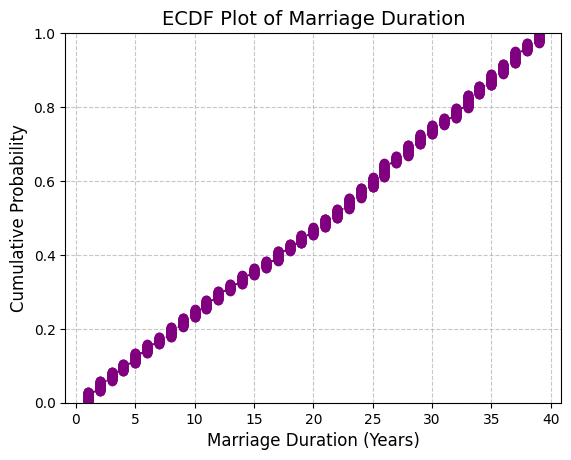

In [12]:
# ECDF plot with enhancements
sns.ecdfplot(data['Marriage Duration (Years)'], color='purple', linestyle='dashed', marker='o')

# Titles and labels
plt.title('ECDF Plot of Marriage Duration', fontsize=14)
plt.xlabel('Marriage Duration (Years)', fontsize=12)
plt.ylabel('Cumulative Probability', fontsize=12)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Show plot
plt.show()

#### Age at Marriage Analysis

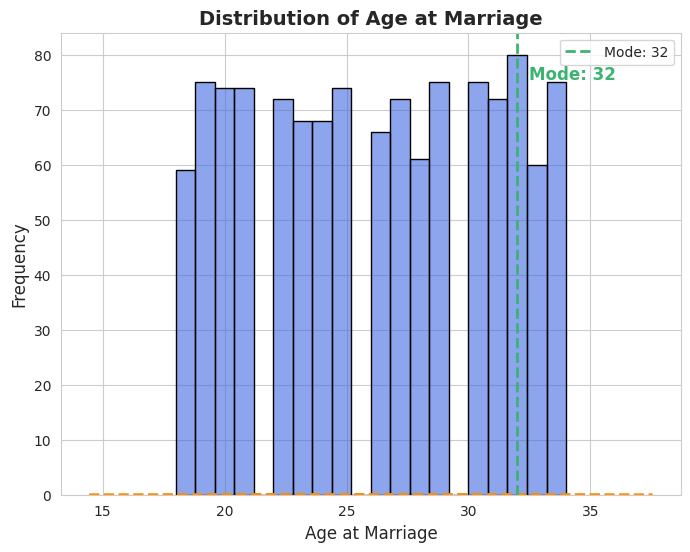

In [13]:
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))
colors = ['royalblue', 'mediumseagreen', 'darkorange']
sns.histplot(data['Age at Marriage'], bins=20, color=colors[0], alpha=0.6, edgecolor='black')
sns.kdeplot(data['Age at Marriage'], color=colors[2], linewidth=2, linestyle='dashed')
plt.title('Distribution of Age at Marriage', fontsize=14, fontweight='bold')
plt.xlabel('Age at Marriage', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
mode_value = data['Age at Marriage'].mode()[0]
plt.axvline(mode_value, color=colors[1], linestyle='--', linewidth=2, label=f'Mode: {mode_value}')
plt.text(mode_value + 0.5, plt.ylim()[1] * 0.9, f'Mode: {mode_value}', 
         color=colors[1], fontsize=12, fontweight='bold')
plt.legend()
plt.show()

#### Divorce Status

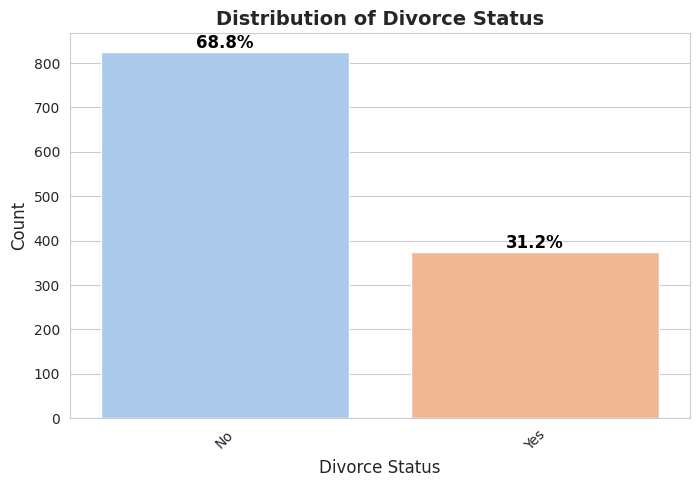

In [14]:
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
colors = sns.color_palette("pastel")
order = data['Divorce Status'].value_counts().index  # Sorting by count
ax = sns.countplot(x='Divorce Status', data=data, order=order, palette=colors)
total = len(data)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')
plt.title('Distribution of Divorce Status', fontsize=14, fontweight='bold')
plt.xlabel('Divorce Status', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()

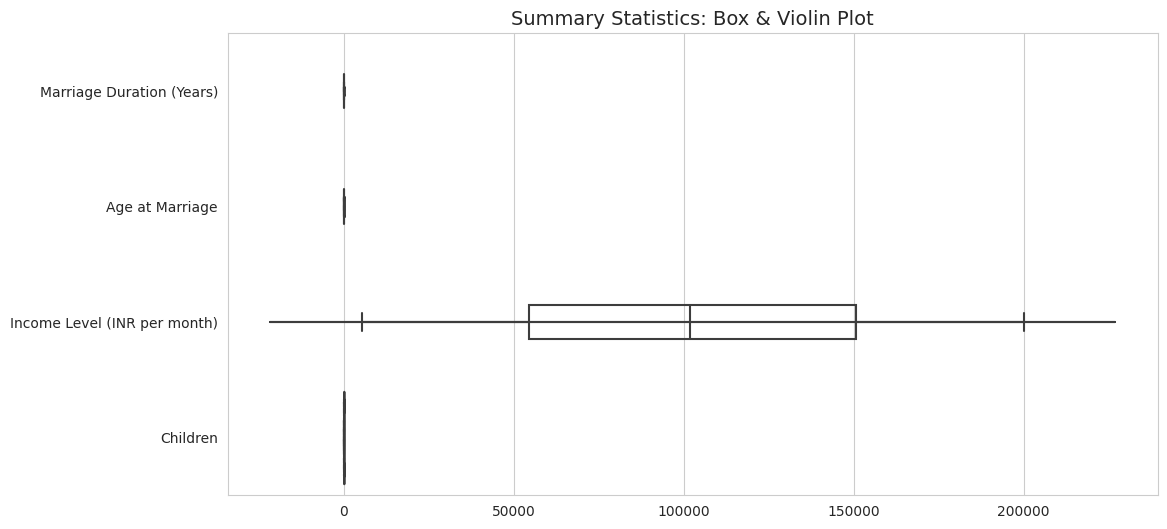

In [15]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, orient='h', showfliers=False, width=0.3, boxprops={'facecolor': 'none'})
sns.violinplot(data=data, orient='h', inner='quartile', alpha=0.5)
plt.title('Summary Statistics: Box & Violin Plot', fontsize=14)
plt.show()

In [16]:
import pandas as pd
from tabulate import tabulate
missing_percentage = data.isnull().mean() * 100
missing_table = (
    missing_percentage
    .reset_index()
    .rename(columns={'index': 'Column', 0: 'Missing Data Percentage (%)'})
    .sort_values(by='Missing Data Percentage (%)', ascending=False) 
    .round(2) 
)
print("\n🔍 Missing Data Summary 🔍\n")
print(tabulate(missing_table, headers='keys', tablefmt='fancy_grid', showindex=False))


🔍 Missing Data Summary 🔍

╒══════════════════════════════╤═══════════════════════════════╕
│ Column                       │   Missing Data Percentage (%) │
╞══════════════════════════════╪═══════════════════════════════╡
│ Unique ID                    │                             0 │
├──────────────────────────────┼───────────────────────────────┤
│ Marriage Duration (Years)    │                             0 │
├──────────────────────────────┼───────────────────────────────┤
│ Age at Marriage              │                             0 │
├──────────────────────────────┼───────────────────────────────┤
│ Marriage Type                │                             0 │
├──────────────────────────────┼───────────────────────────────┤
│ Education Level              │                             0 │
├──────────────────────────────┼───────────────────────────────┤
│ Income Level (INR per month) │                             0 │
├──────────────────────────────┼───────────────────────────────

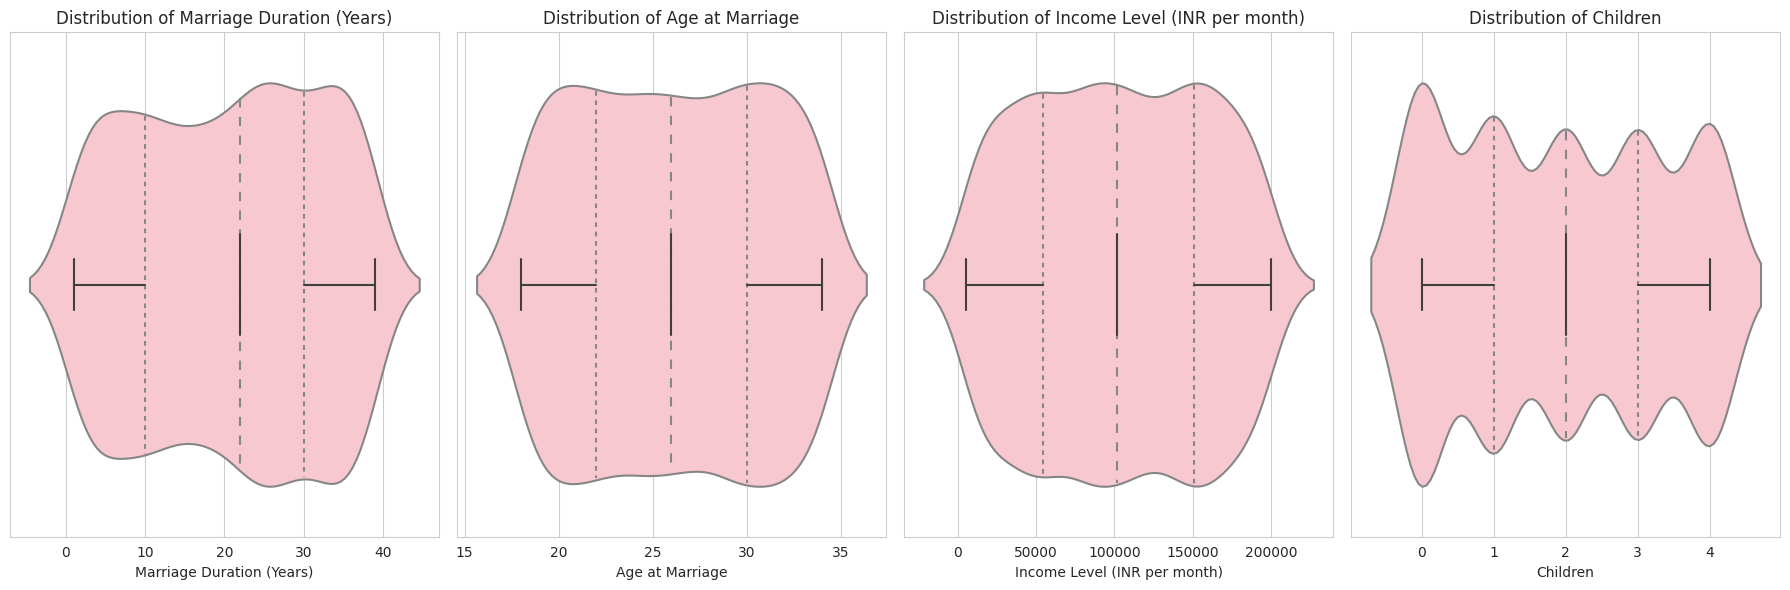

In [17]:
def remove_outliers(data):
    numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
    num_columns = len(numeric_columns)
    num_per_row = 4
    num_rows = -(-num_columns // num_per_row)  # Equivalent to math.ceil(num_columns / num_per_row)
    fig, axes = plt.subplots(num_rows, num_per_row, figsize=(18, 6 * num_rows))
    axes = axes.flatten()
    cleaned_data = data.copy()
    for i, column in enumerate(numeric_columns):
        Q1, Q3 = cleaned_data[column].quantile([0.25, 0.75])
        IQR = Q3 - Q1
        lower_bound, upper_bound = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
        cleaned_data = cleaned_data[(cleaned_data[column] >= lower_bound) & (cleaned_data[column] <= upper_bound)]
        sns.violinplot(x=cleaned_data[column], ax=axes[i], inner='quartile', color='pink', alpha=0.7)
        sns.boxplot(x=cleaned_data[column], ax=axes[i], showfliers=False, width=0.2, boxprops={'facecolor': 'none'})
        axes[i].set_title(f'Distribution of {column}', fontsize=12)
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)
    plt.tight_layout()
    plt.show()
    return cleaned_data
data = remove_outliers(data)

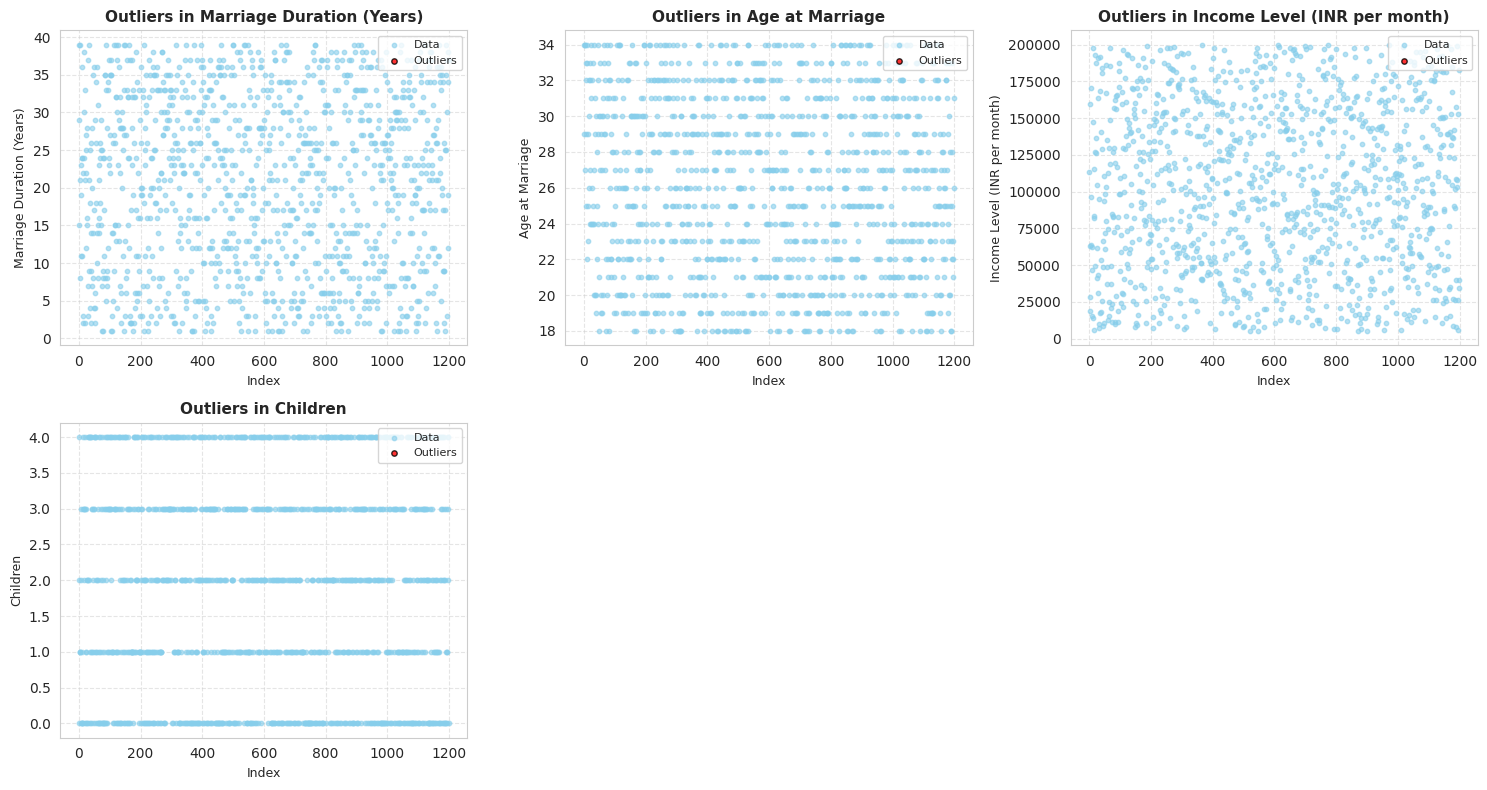

In [18]:
def plot_outliers_iqr(data):
    numeric_columns = data.select_dtypes(include=[np.number]).columns
    threshold = 1.5 
    n_cols = 3
    n_rows = -(-len(numeric_columns) // n_cols)  # Equivalent to math.ceil(len(numeric_columns) / n_cols)
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4), squeeze=False)
    axes = axes.flatten()  
    for idx, column in enumerate(numeric_columns):
        Q1, Q3 = data[column].quantile([0.25, 0.75])
        IQR = Q3 - Q1
        lower_bound, upper_bound = Q1 - threshold * IQR, Q3 + threshold * IQR
        outliers = (data[column] < lower_bound) | (data[column] > upper_bound)
        axes[idx].scatter(data.index, data[column], color='skyblue', label='Data', alpha=0.6, s=10)
        axes[idx].scatter(
            data.index[outliers], data[column][outliers], 
            color='red', label='Outliers', alpha=0.8, edgecolors='black', s=15
        )
        axes[idx].set_title(f"Outliers in {column}", fontsize=11, fontweight='bold')
        axes[idx].set_xlabel("Index", fontsize=9)
        axes[idx].set_ylabel(column, fontsize=9)
        axes[idx].legend(fontsize=8, loc="upper right")
        axes[idx].grid(True, linestyle='--', alpha=0.5)
    for ax in axes[len(numeric_columns):]:
        ax.axis('off')
    plt.tight_layout()
    plt.show()
plot_outliers_iqr(data)

In [19]:
data = data.drop(columns=['Unique ID'])

In [20]:
encoder = LabelEncoder()

label_mappings = {}

for col in data.select_dtypes('object'):
    data[col] = encoder.fit_transform(data[col])
    label_mappings[col] = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

for col, mapping in label_mappings.items():
    print(f"Column: {col}")
    for label, code in mapping.items():
        print(f"{code} -> {label}")
    print()

## Random Forest

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix



X = data.drop(columns=['Divorce Status'])
X = pd.get_dummies(X, drop_first=True)
y = data['Divorce Status'].cat.codes  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7291666666666666

### KNN Classifier

In [22]:
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)

In [23]:
y_pred = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred)
knn_accuracy

0.6541666666666667

### Logistic regression

In [24]:
loj = LogisticRegression(solver = 'liblinear')
loj_model = loj.fit(X, y)

In [25]:
y_pred = loj_model.predict(X)
lr_accuracy = accuracy_score(y, y_pred)
lr_accuracy

0.6883333333333334

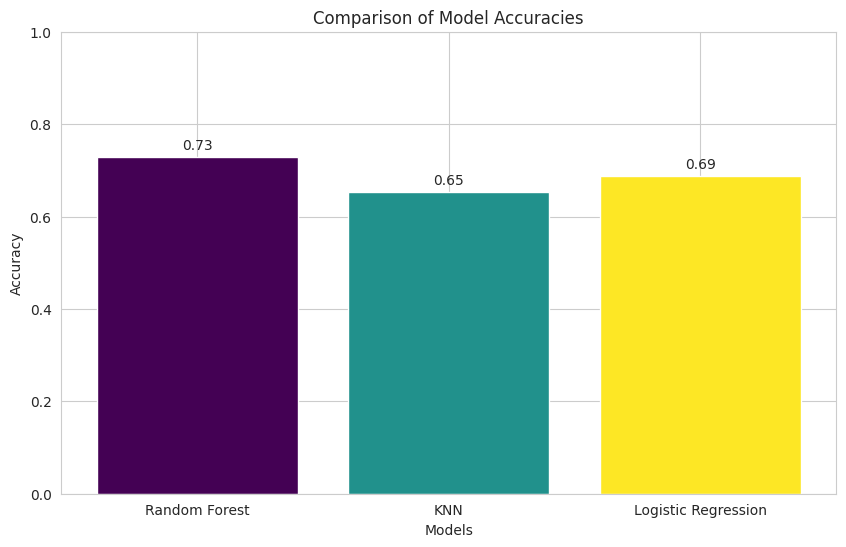

In [26]:

rf_accuracy =0.7291 
knn_accuracy = 0.6541  
lr_accuracy = 0.68833 
models = ['Random Forest', 'KNN', 'Logistic Regression']
accuracies = [rf_accuracy, knn_accuracy, lr_accuracy]
colors = plt.cm.viridis(np.linspace(0, 1, len(models)))
plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color=colors)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim(0, 1)
for bar, accuracy in zip(bars, accuracies):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{accuracy:.2f}', ha='center', va='bottom')

plt.show()

## Discussion and Conclusion

This notebook delved into the complex marriage and divorce trends in India by analyzing a detailed dataset. We visualized key factors such as marriage duration, age at marriage, and income levels, and developed a predictive model to estimate the likelihood of divorce based on these variables.


While the predictive model is relatively simple, it serves as a foundational approach for understanding the factors that contribute to divorce. However, this analysis is just the beginning—there is ample room for deeper exploration. Future research could consider examining cultural, societal, and longitudinal factors that influence divorce rates, potentially incorporating more granular data for richer insights.


If you found this analysis valuable, your upvote would be much appreciated! Feedback helps refine future work and encourages continuous improvement in this area of research.

In [27]:
print("Thank you")

Thank you
